## Pandas 

In [44]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 8

### 1- Small Showcase 

### Case_1

Reading the csv file `data/titanic.csv`

In [15]:
## impoting the data/titanic.csv
data = pd.read_csv('data/titanic.csv')

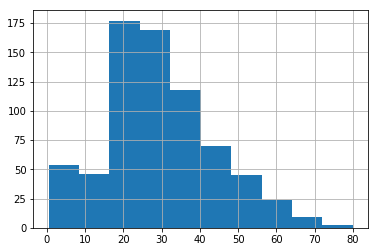

In [16]:
data['Age'].hist()
plt.show()

In [18]:
# showing the survived persons by gender
data.groupby('Sex')[['Survived']].sum()

,Survived
Sex,
female,233
male,109


In [20]:
data.groupby('Pclass')[['Survived']].sum()

,Survived
Pclass,
1,136
2,87
3,119


### Case_2

Referendum results of 2013.  

In [57]:
df_ref = pd.read_csv('data/Referendum.csv', sep=';')
df_ref.head()

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Blancs et nuls,Choix A,Choix B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52


In [64]:
# Grouping by departments the results 
df_departments= df_ref.groupby('Code du département').sum().reset_index()
# Calculating the overall results of the referendum 
elec_13 = df_departments[['Abstentions', 'Blancs et nuls', 'Choix A', 'Choix B']]
overall = elec_13.sum()
overall.name = 'Total results of the Referendum'
overall

Abstentions        9444143
Blancs et nuls      701190
Choix A           15699580
Choix B           20183629
Name: Total results of the Referendum, dtype: int64

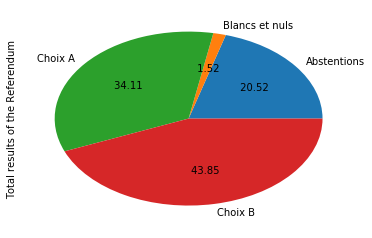

In [65]:
# plotting the results 
overall.plot.pie(autopct='% 0.2f')

### Pandas: data analysis in python
For data-intensive work in Python the Pandas library has become essential.

* What is pandas?
    * Pandas can be thought of as NumPy arrays with labels for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
    * Pandas can also be thought of as R's data.frame in Python.
    * Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/

* When do you need pandas?
    When working with tabular or structured data (like R dataframe, SQL table, Excel spreadsheet, ...):
    * Import data
    * Clean up messy data
    * Explore data, gain insight into data
    * Process and prepare your data for analysis
    * Analyse your data (together with scikit-learn, statsmodels, ...)

ATTENTION!:

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
    * When working with array data (e.g. images, numerical algorithms): just stick with numpy
    * When working with multidimensional labeled data (e.g. climate data): have a look at [xarray]
    (http://xarray.pydata.org/en/stable/)



### 2- Pandas Dataframe 
A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.


<img align="left" width=50% src="images/schema-dataframe.svg">

### 2.1 - Exploring the data

Showing the first five elements of the data

In [66]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Showing the last five elements of the data

In [22]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [24]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.2- Indexing, slicing

In [30]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
data.index

RangeIndex(start=0, stop=891, step=1)

In [36]:
data.loc[2]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                                26
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [37]:
data.iloc[2]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                                26
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [42]:
df = data.set_index('Name')
df.index

Index(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       ...
       'Markun, Mr. Johann', 'Dahlberg, Miss. Gerda Ulrika',
       'Banfield, Mr. Frederick James', 'Sutehall, Mr. Henry Jr',
       'Rice, Mrs. William (Margaret Norton)', 'Montvila, Rev. Juozas',
       'Graham, Miss. Margaret Edith',
       'Johnston, Miss. Catherine Helen "Carrie"', 'Behr, Mr. Karl Howell',
       'Dooley, Mr. Patrick'],
      dtype='object', name='Name', length=891)

In [39]:
df.loc['Heikkinen, Miss. Laina']

PassengerId                   3
Survived                      1
Pclass                        3
Sex                      female
Age                          26
SibSp                         0
Parch                         0
Ticket         STON/O2. 3101282
Fare                      7.925
Cabin                       NaN
Embarked                      S
Name: Heikkinen, Miss. Laina, dtype: object

In [40]:
df.iloc[2]

PassengerId                   3
Survived                      1
Pclass                        3
Sex                      female
Age                          26
SibSp                         0
Parch                         0
Ticket         STON/O2. 3101282
Fare                      7.925
Cabin                       NaN
Embarked                      S
Name: Heikkinen, Miss. Laina, dtype: object

In [41]:
data.iloc[:, 5]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [45]:
# taking a column by passing its tag
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [47]:
# Taking different columns 
data[['Age', 'Survived']]

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
...,...,...
887,19.0,1
888,NaN,0
889,26.0,1
890,32.0,0


In [49]:
data[['Age', 'Survived']].iloc[5:10, :]

,Age,Survived
5,NaN,0
6,54.0,0
7,2.0,0
8,27.0,1
9,14.0,1


**Slicing the dataframe using boolean array/Series **

In [54]:
df[df['Age'] > 50]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.5500,C103,S
"Hewlett, Mrs. (Mary D Kingcome)",16,1,2,female,55.0,0,0,248706,16.0000,NaN,S
"Wheadon, Mr. Edward H",34,0,2,male,66.0,0,0,C.A. 24579,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Stone, Mrs. George Nelson (Martha Evelyn)",830,1,1,female,62.0,0,0,113572,80.0000,B28,NaN
"Svensson, Mr. Johan",852,0,3,male,74.0,0,0,347060,7.7750,NaN,S
"Daly, Mr. Peter Denis",858,1,1,male,51.0,0,0,113055,26.5500,E17,S
"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",880,1,1,female,56.0,0,1,11767,83.1583,C50,C


### 2.3-  The groupby operation

Lets create a dataframe with two columns **key** and **data**, where in **key** we have three class of **A**, **B** and **C**.

In [76]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
...,...,...
5,15,C
6,10,A
7,15,B
8,20,C


When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [68]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [69]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

**Groupby: applying functions per group**

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="images/splitApplyCombine.png">

Similar to SQL `GROUP BY

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [71]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [72]:
df.groupby('key').mean()

,data
key,
A,5
B,10
C,15


Using groupby we can easily aggregate some functions, such as:

In [75]:
df.groupby('key').aggregate(['sum', 'min', 'max'])

data        
     sum min max
key             
A     15   0  10
B     30   5  15
C     45  10  20

<div class="alert alert-success">
<b>EXERCISE- Application of groupby on titanic data</b>:

 <ul>
  <li>Read the `data/titanic.csv` file into a dataframe </li>
  
</ul>
</div>

<div class="alert alert-success">

 <ul>
  <li>Using groupby(), calculate the average age for each sex.</li>
  
</ul>
</div>

<div class="alert alert-success">

 <ul>
  <li> Calulate the average survival ratio for all passengers.</li>
  
 
</ul>
</div>

<div class="alert alert-success">
<ul>
    <li>Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing)</li>
</ul>
</div>

<div class="alert alert-success">
 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

<div class="alert alert-success">

 <ul>
  <li>Or how does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 classes.</li>
</ul>
</div>

### What we didnt talked about and its interesting to know

- working with timeseries
- Concatenating data: `pd.concat`
- Merging and joining data: `pd.merge`
- Reshaping data: `pivot_table`, `melt`, `stack`, `unstack`
- Working with missing data: `isnull`, `dropna`, `interpolate`, ...
- geopandas
- ...

---
##  Acknowledgement
> This notebook is mostly based on the material of CDS python workshop © 2017 presented by Joris Van den Bossche <https://github.com/jorisvandenbossche/pandas-tutorial>